In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
airp=pd.read_excel('C:/Users/HP/Downloads/Group_5.xlsx')

In [3]:
airp.head()

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,NaN,Andhra Pradesh,Hyderabad,NaN,Industrial Areas,5.2,31.7,105.0,311.0,C.I.T.D. Balanagar,NaN,2008-02-01
1,NaN,Andhra Pradesh,Hyderabad,NaN,Industrial Areas,5.4,35.0,163.0,399.0,C.I.T.D. Balanagar,NaN,2008-04-01
2,NaN,Andhra Pradesh,Hyderabad,NaN,Industrial Areas,5.5,30.3,154.0,368.0,C.I.T.D. Balanagar,NaN,2008-08-01
3,NaN,Andhra Pradesh,Hyderabad,NaN,Industrial Areas,5.5,27.2,137.0,355.0,C.I.T.D. Balanagar,NaN,2008-10-01
4,NaN,Andhra Pradesh,Hyderabad,NaN,Industrial Areas,4.8,24.7,94.0,225.0,C.I.T.D. Balanagar,NaN,2008-01-14


In [4]:
airp['state'].replace('Uttaranchal','Uttarakhand',inplace=True)

In [5]:
airp.isnull().sum()

stn_code                        61500
state                               0
location                            0
agency                          61500
type                                0
so2                             11939
no2                              3979
rspm                             3479
spm                             52541
location_monitoring_station         0
pm2_5                          134116
date                                0
dtype: int64

In [6]:
airp['pm2_5'].unique()

array([nan])

In [7]:
airp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134116 entries, 0 to 134115
Data columns (total 12 columns):
stn_code                       72616 non-null float64
state                          134116 non-null object
location                       134116 non-null object
agency                         72616 non-null object
type                           134116 non-null object
so2                            122177 non-null float64
no2                            130137 non-null float64
rspm                           130637 non-null float64
spm                            81575 non-null float64
location_monitoring_station    134116 non-null object
pm2_5                          0 non-null float64
date                           134116 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 12.3+ MB


In [8]:
airp.drop(['stn_code','agency','pm2_5'],axis=1,inplace=True)

In [9]:
airp.describe()

,so2,no2,rspm,spm
count,122177.000000,130137.000000,130637.000000,81575.000000
mean,10.810954,27.236068,113.410485,229.386997
std,11.721997,18.877362,80.364593,154.795765
min,0.000000,0.000000,1.000000,1.610000
25%,5.000000,15.000000,57.000000,117.000000
50%,8.200000,22.900000,92.000000,191.333333
75%,13.500000,34.000000,148.000000,303.000000
max,909.000000,592.000000,6307.033333,2485.000000


In [10]:
airp['type'].unique()

array(['Industrial Areas', 'Residential and others', 'Sensitive Areas',
       'Sensitive Area', 'Residential, Rural and other Areas',
       'Industrial Area'], dtype=object)

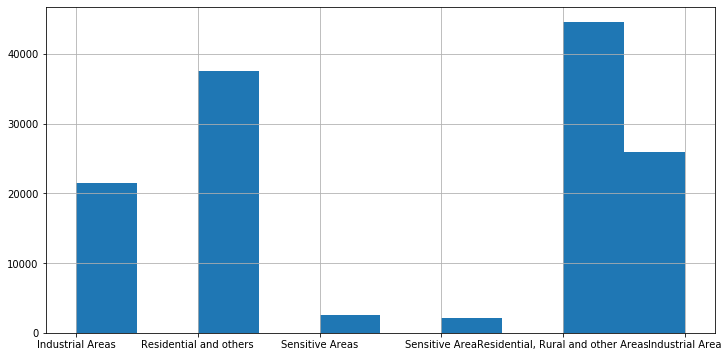

In [11]:
airp['type'].hist(figsize=(12,6))

In [12]:
airp.replace({'type':{'Industrial Area':'Industrial Areas','Sensitive Area':'Sensitive Areas','Residential, Rural and other Areas':'Residential and others'}},inplace=True)

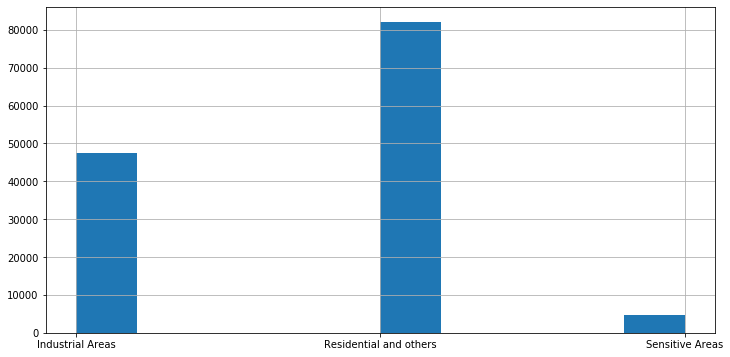

In [13]:
airp['type'].hist(figsize=(12,6))

In [14]:
#airp[airp['location']=='kochi']=b

In [15]:
#airp[airp['location']=='kochi']=airp[airp['location']=='Kochi']['so2'].fillna(3,inplace=True)

In [ ]:
#imputing median value for missing values location wise. 

In [16]:
x=airp['location'].unique()

In [17]:
med=[]
for j in x:
    m=airp[airp['location']==j]['so2'].median()
    med.append(m)

In [18]:
#med

In [19]:
index=[]
for i in x:
    ind=airp[airp['location']==i].index.values
    index.append(list([ind[0],ind[-1]]))

In [20]:
#index

In [21]:
for key,value in enumerate(index):
    airp.loc[value[0]:value[-1],'so2'].fillna(med[key],inplace=True)
    #print(value)

In [22]:
med1=[]
for j in x:
    m=airp[airp['location']==j]['no2'].median()
    med1.append(m)

In [23]:
#med1

In [24]:
for key,value in enumerate(index):
    airp.loc[value[0]:value[-1],'no2'].fillna(med1[key],inplace=True)

In [25]:
airp.isnull().sum()

state                              0
location                           0
type                               0
so2                                0
no2                                0
rspm                            3479
spm                            52541
location_monitoring_station        0
date                               0
dtype: int64

In [26]:
med2=[]
for j in x:
    m=airp[airp['location']==j]['rspm'].median()
    med2.append(m)

In [27]:
for key,value in enumerate(index):
    airp.loc[value[0]:value[-1],'rspm'].fillna(med2[key],inplace=True)

In [28]:
med3=[]
for j in x:
    m=airp[airp['location']==j]['spm'].median()
    med3.append(m)

In [29]:
for key,value in enumerate(index):
    airp.loc[value[0]:value[-1],'spm'].fillna(med3[key],inplace=True)

In [30]:
airp.dropna(axis=0,inplace=True)
airp.isnull().sum()

state                          0
location                       0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
date                           0
dtype: int64

In [31]:
#airp[airp['spm']==np.nan]

In [32]:
#med3

In [33]:
#for j in index:
#airp[airp['location']==j]['spm']==np.nan

In [34]:
#airp[airp['location']=='Rudrapur']['spm'].isnull().sum()

In [35]:
#indnull=[]
#for j in x:
    #a=airp[airp['location']==j]['spm'].isnull().all()
    #if a==True:
        #indnull.append(j)
    

In [36]:
#indnull

In [37]:
#index1=[]
#for i in indnull:
    #ind1=airp[airp['location']==i].index.values
    #index1.append([ind1[0],ind1[-1]])

In [38]:
#index1

In [39]:
#for i,j in enumerate(index1):
    #airp.drop(airp.index[j[0]:j[1]+1])
    #print(j)

In [40]:
#bb=airp.drop(airp.index[4828:4931])

In [41]:
#airp[airp['location']=='Daranga']

In [42]:
#airp[airp['location']=='Wayanad']['spm']

In [43]:
#airp.drop(airp[airp['location']=='Wayanad'],axis=1)

In [44]:
#airp

In [45]:
airp.describe()

,so2,no2,rspm,spm
count,132669.000000,132669.000000,132669.000000,132669.000000
mean,10.349996,27.066385,114.762616,230.913081
std,11.404932,18.762891,80.196709,140.564192
min,0.000000,0.000000,1.000000,1.610000
25%,4.800000,15.000000,58.000000,131.000000
50%,7.900000,22.500000,94.000000,200.000000
75%,13.000000,34.000000,151.000000,295.000000
max,909.000000,592.000000,6307.033333,2485.000000


In [320]:
#airp.head()

In [54]:
so2=airp[['state','so2']].groupby(['state']).median().sort_values(by='so2',ascending=False).reset_index()

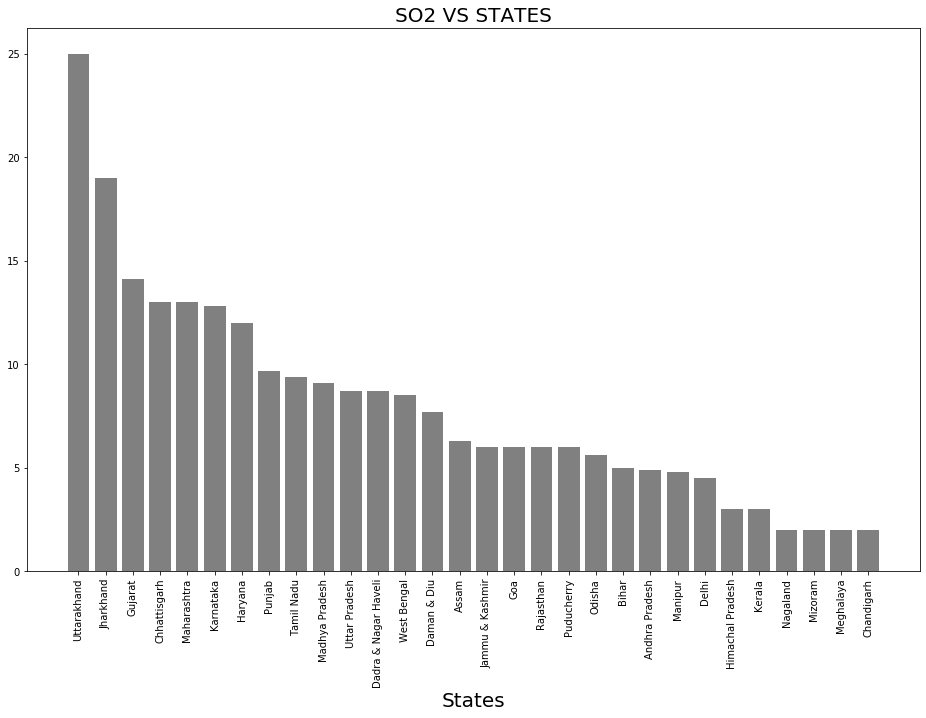

In [55]:
plt.figure(figsize=(16,10))
plt.bar(so2['state'],so2['so2'],color='grey')
plt.xlabel('States',size=20)
plt.xticks(rotation=90)
#plt.legend(frameon=True,fontsize=12)
plt.title('SO2 VS STATES',fontsize=20)
plt.show()

In [56]:
no2=airp[['state','no2']].groupby(['state']).median().sort_values(by='no2',ascending=False).reset_index()

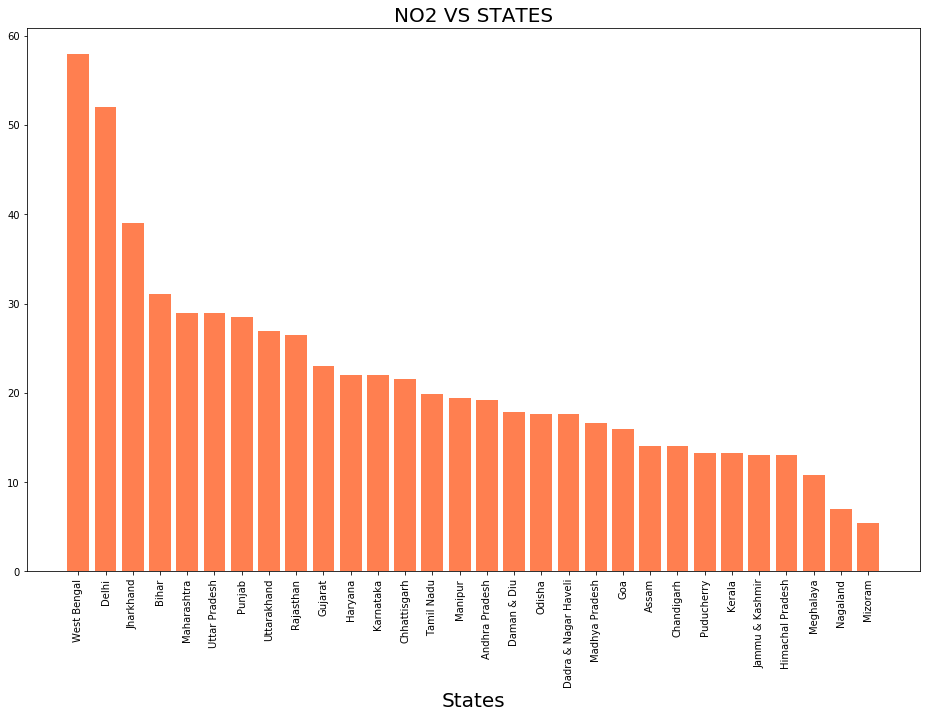

In [62]:
plt.figure(figsize=(16,10))
plt.bar(no2['state'],no2['no2'],color='coral')
#plt.bar(so2['state'],so2['so2'],color='coral')
plt.xlabel('States',size=20)
plt.xticks(rotation=90)
#plt.legend()
plt.title('NO2 VS STATES',fontsize=20)
plt.show()

In [67]:
rspm=airp[['state','rspm']].groupby(['state']).median().sort_values(by='rspm',ascending=False).reset_index()

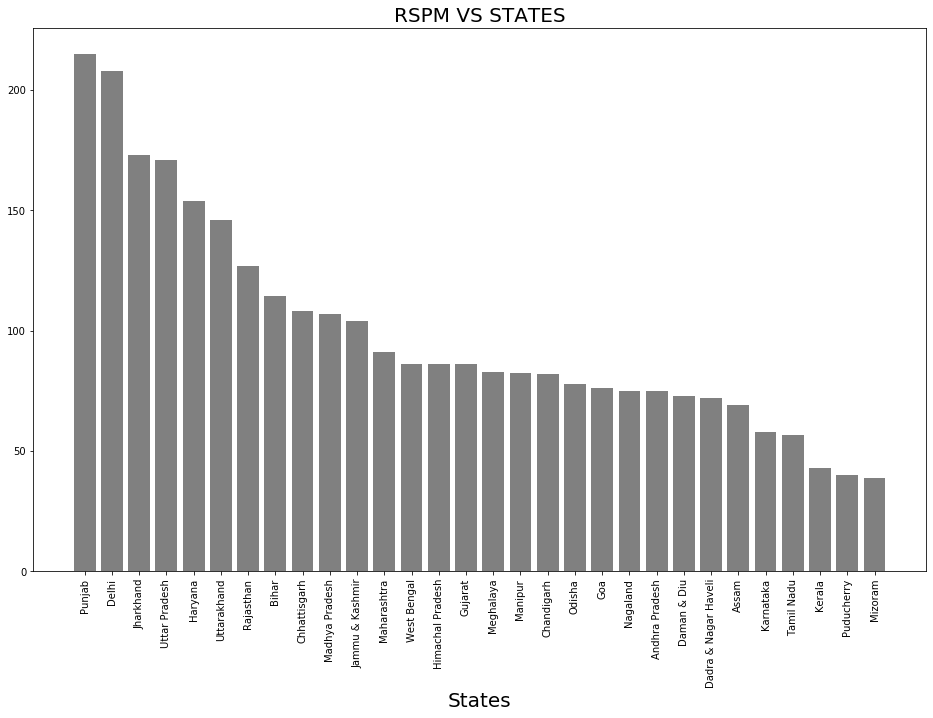

In [68]:
plt.figure(figsize=(16,10))
plt.bar(rspm['state'],rspm['rspm'],color='grey')
#plt.bar(so2['state'],so2['so2'],color='coral')
plt.xlabel('States',size=20)
plt.xticks(rotation=90)
#plt.legend()
plt.title('RSPM VS STATES',fontsize=20)
plt.show()

In [69]:
spm=airp[['state','spm']].groupby(['state']).median().sort_values(by='spm',ascending=False).reset_index()

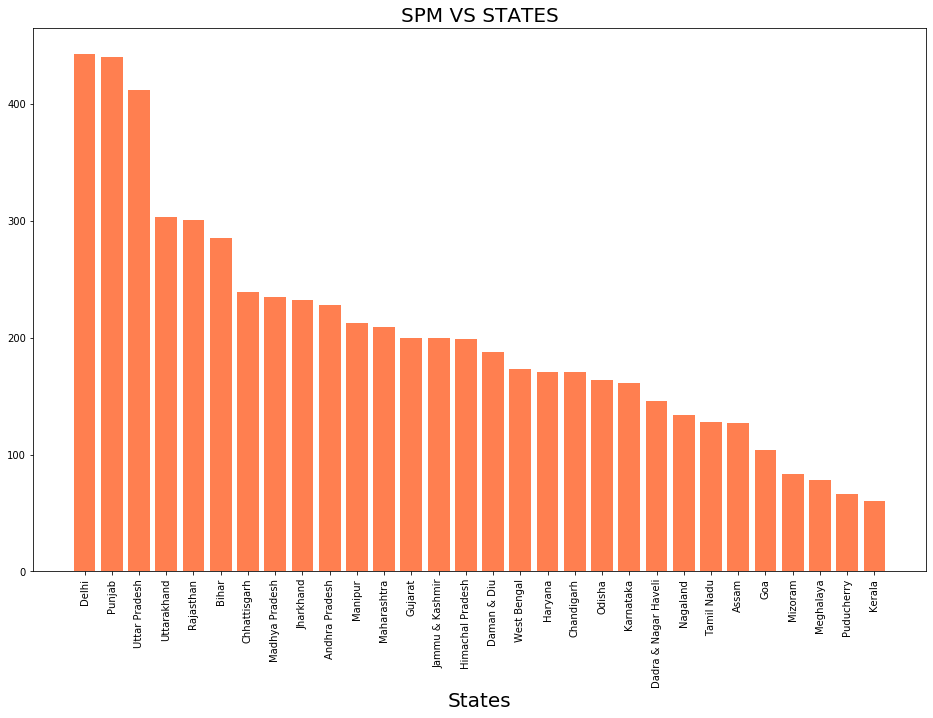

In [70]:
plt.figure(figsize=(16,10))
plt.bar(spm['state'],spm['spm'],color='coral')
#plt.bar(so2['state'],so2['so2'],color='coral')
plt.xlabel('States',size=20)
plt.xticks(rotation=90)
#plt.legend()
plt.title('SPM VS STATES',fontsize=20)
plt.show()

In [71]:
spmloc=airp[['location','spm']].groupby(['location']).median().sort_values(by='spm',ascending=False).reset_index().head(50)

In [73]:
#spmloc

In [ ]:
#since spm is the most critical component we are checking spm count location wise for top 50 location and least 50 location.

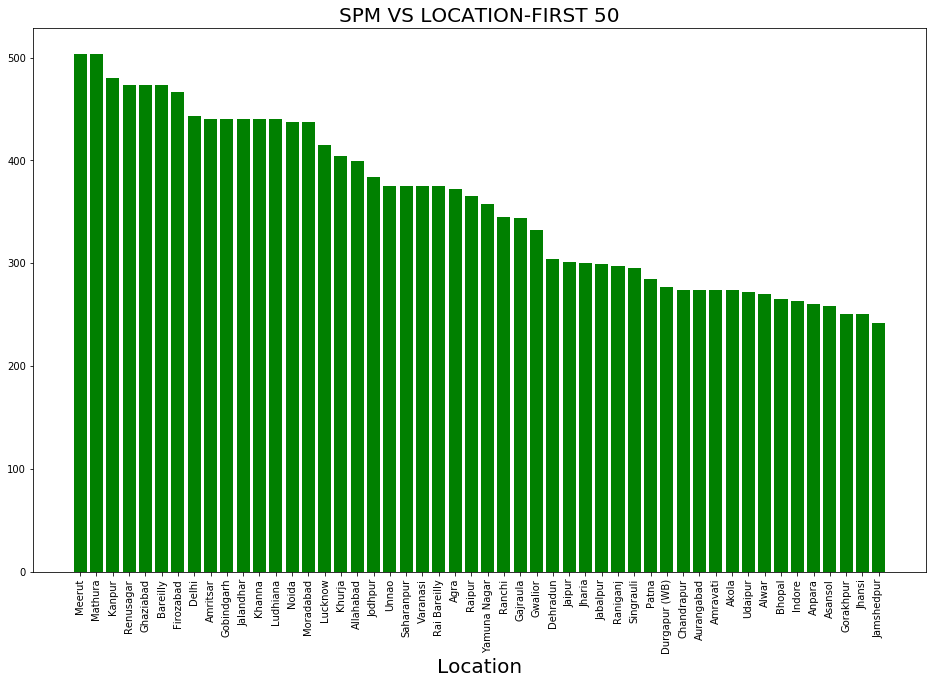

In [318]:
plt.figure(figsize=(16,10))
plt.bar(spmloc['location'],spmloc['spm'],color='green')
#plt.bar(so2['state'],so2['so2'],color='coral')
plt.xlabel('Location',size=20)
plt.xticks(rotation=90)
#plt.legend()
plt.title('SPM VS LOCATION-FIRST 50',fontsize=20)
plt.show()

In [76]:
spmloc1=airp[['location','spm']].groupby(['location']).median().sort_values(by='spm',ascending=False).reset_index().tail(50)

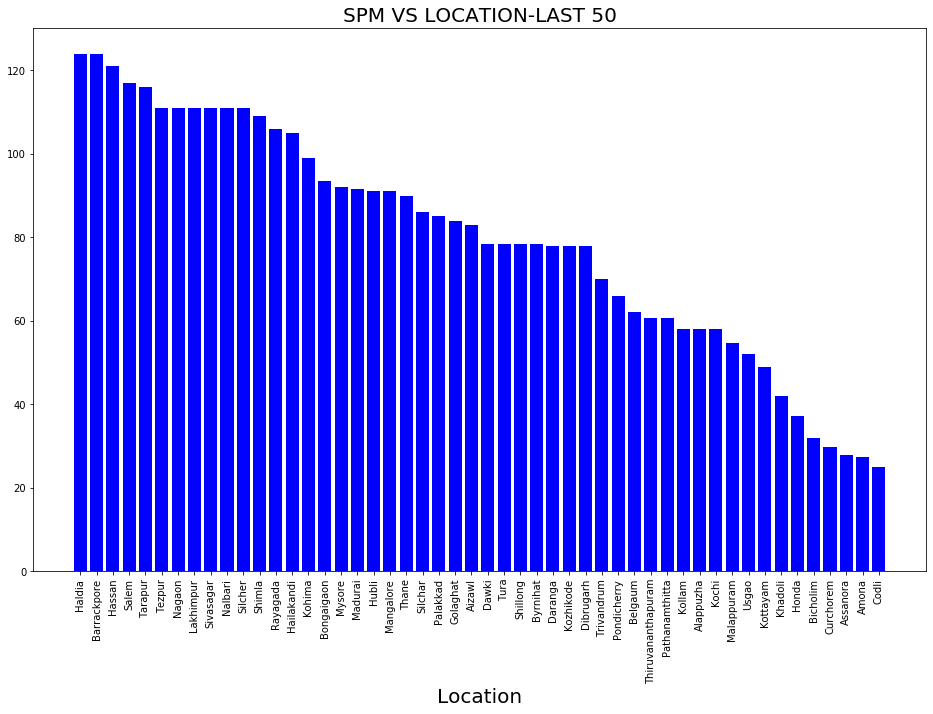

In [319]:
plt.figure(figsize=(16,10))
plt.bar(spmloc1['location'],spmloc1['spm'],color='blue')
#plt.bar(so2['state'],so2['so2'],color='coral')
plt.xlabel('Location',size=20)
plt.xticks(rotation=90)
#plt.legend()
plt.title('SPM VS LOCATION-LAST 50',fontsize=20)
plt.show()

In [84]:
airp['year']=airp['date'].dt.year

In [ ]:
#ploting year wise growth of all the components.

In [93]:
air=airp[['year','so2','no2','spm','rspm']].groupby('year').median().reset_index()

In [94]:
air

,year,so2,no2,spm,rspm
0,2008,7.90,22.5,200.0,94.0
1,2009,7.40,22.4,207.0,95.0
2,2010,7.95,21.0,200.0,90.0
3,2011,8.00,24.0,199.0,97.0


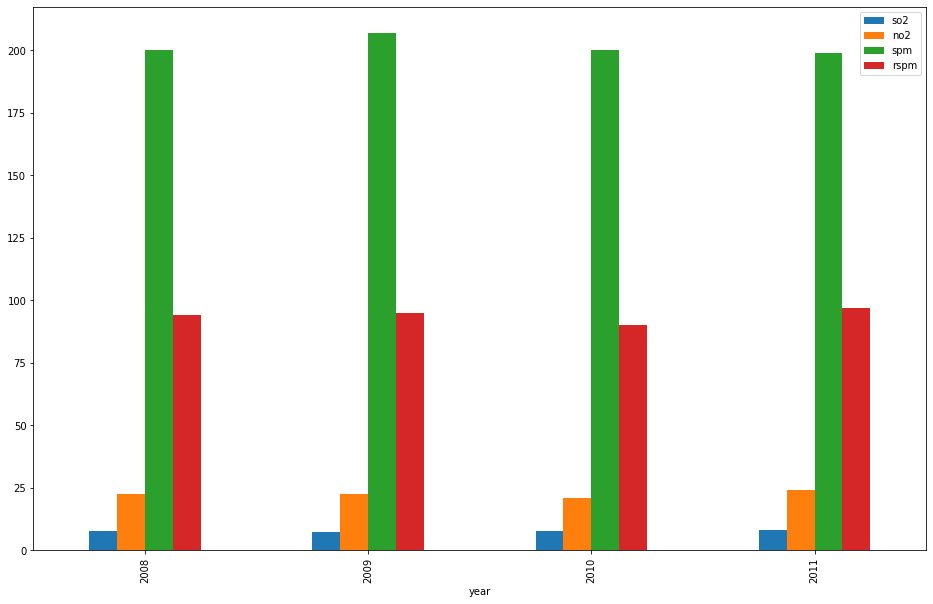

In [96]:
air.plot(x='year',y=['so2','no2','spm','rspm'],kind='bar',figsize=(16,10))

In [317]:
#airp

In [98]:
types=airp[['type','so2','no2','spm','rspm']].groupby('type').median().reset_index()

In [ ]:
#ploting area wise growth of all components.

In [99]:
types

,type,so2,no2,spm,rspm
0,Industrial Areas,9.8,26.0,211.0,110.0
1,Residential and others,7.0,21.2,197.0,88.0
2,Sensitive Areas,4.8,16.8,214.0,64.0


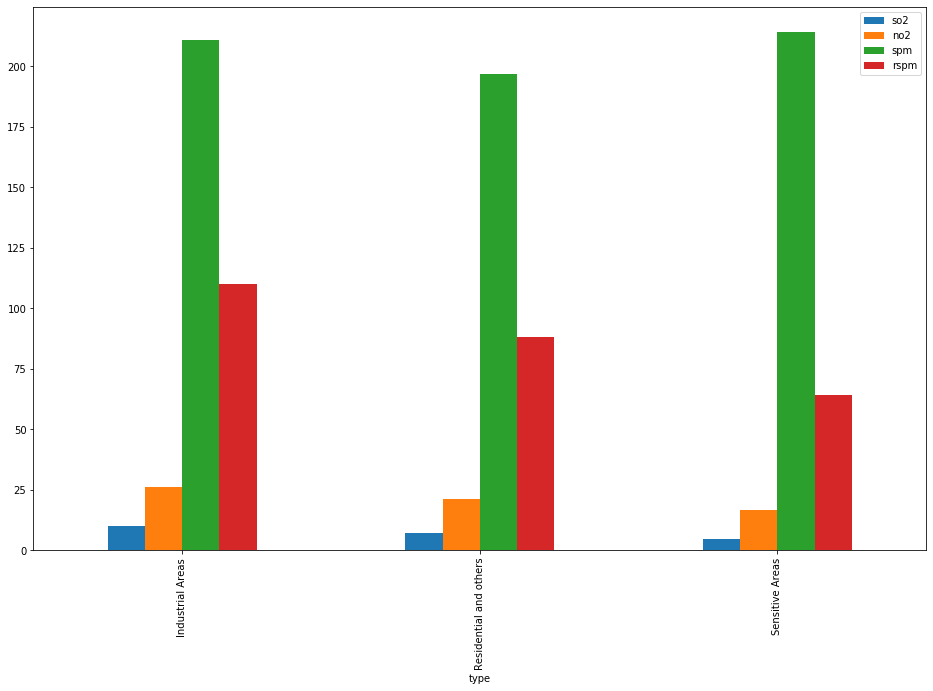

In [100]:
types.plot(x='type',y=['so2','no2','spm','rspm'],kind='bar',figsize=(16,10))

In [104]:
loc=airp[['state','location_monitoring_station']].groupby('state').count().sort_values(by='location_monitoring_station',ascending=False).reset_index()

In [ ]:
#count of monitoring stations each state have.

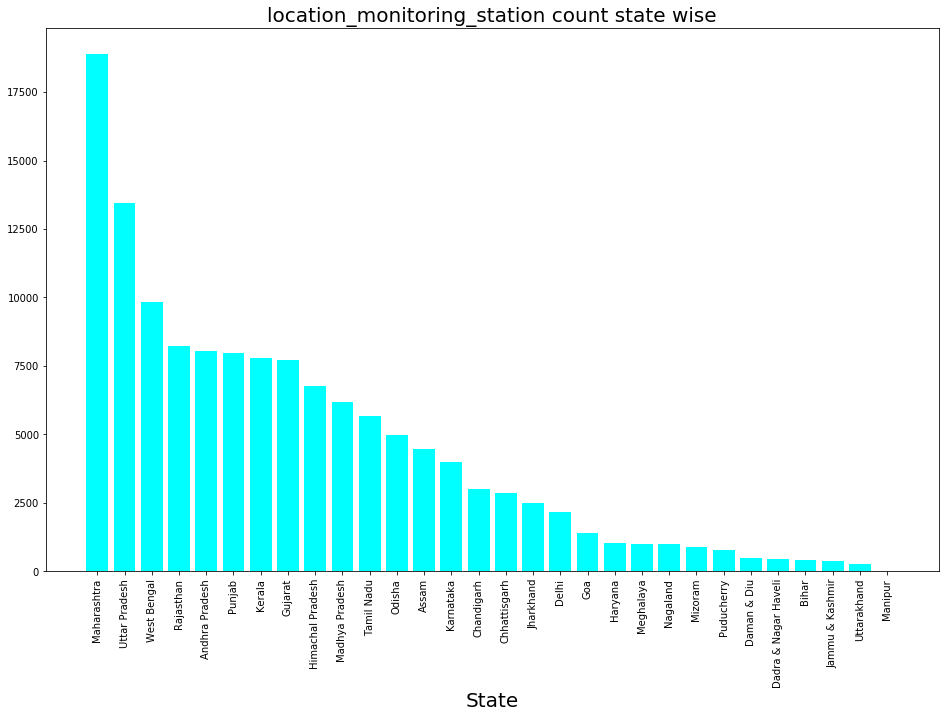

In [201]:
plt.figure(figsize=(16,10))
plt.bar(loc['state'],loc['location_monitoring_station'],color='cyan')
#plt.bar(so2['state'],so2['so2'],color='coral')
plt.xlabel('State',size=20)
plt.xticks(rotation=90)
#plt.legend()
plt.title('location_monitoring_station count state wise',fontsize=20)
plt.show()

In [119]:
#airp[['state','so2','no2','spm','rspm','year']].groupby('state').min().sort_values(by=['so2','no2','spm','rspm'],ascending=True).reset_index()

In [182]:
#airp.loc[(airp['state']=='Puducherry') & (airp['state']=='Kerala')]

In [220]:
airpf=airp.copy()

In [221]:
airpf['states']=airpf['state']

In [223]:
airpf=airpf.set_index('state')

In [321]:
#airpf

In [225]:
south=airpf.loc[['Puducherry','Kerala','Andhra Pradesh','Karnataka','Tamil Nadu']]

In [322]:
#south

In [227]:
south1=south[['states','year','so2','no2','spm','rspm']].groupby('states').median().reset_index()

In [323]:
#south1

In [229]:
north=airpf.loc[['Delhi','Haryana','Jammu & Kashmir','Himachal Pradesh','Uttarpradesh','Punjab','Uttarakhand']]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [163]:
#north

In [230]:
north1=north[['states','year','so2','no2','spm','rspm']].groupby('states').median().reset_index()

In [324]:
#north1

In [200]:
#south1.plot(x='year',y=['so2','no2','spm','rspm'],kind='line',figsize=(16,10))
#north1.plot(x='year',y=['so2','no2','spm','rspm'],kind='bar',figsize=(16,10))

In [ ]:
#ploting zone wise count of all components.

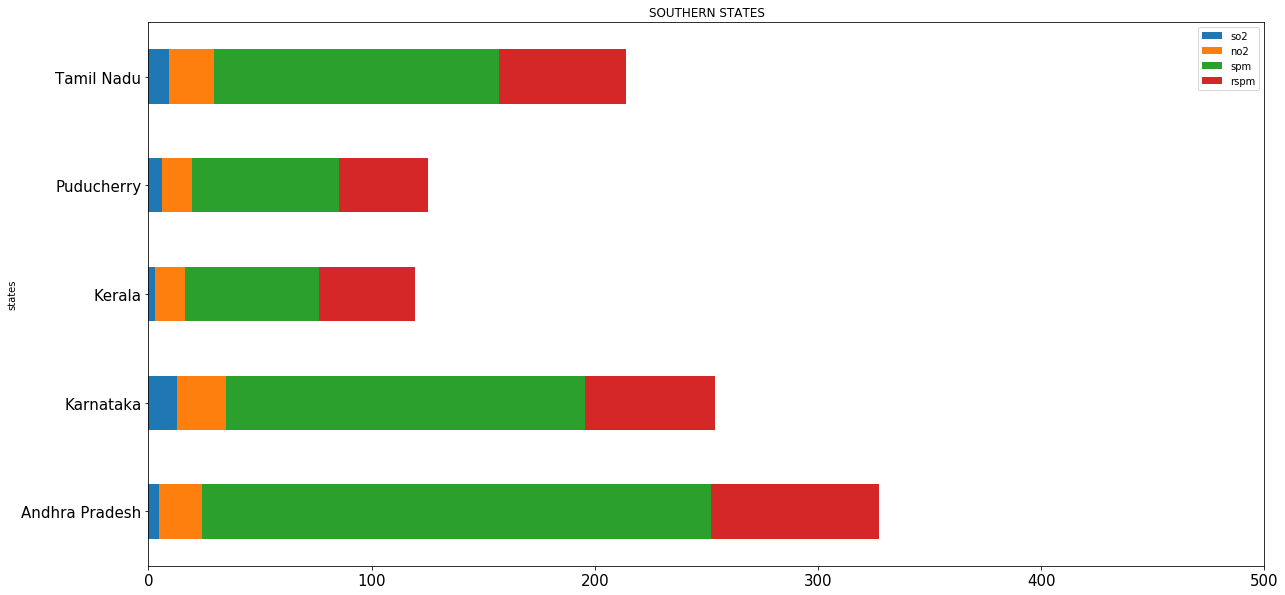

In [232]:
south1.plot(x='states',y=['so2','no2','spm','rspm'],kind='barh',xlim=(0,500),stacked=True,title='SOUTHERN STATES',figsize=(20,10),fontsize=15)

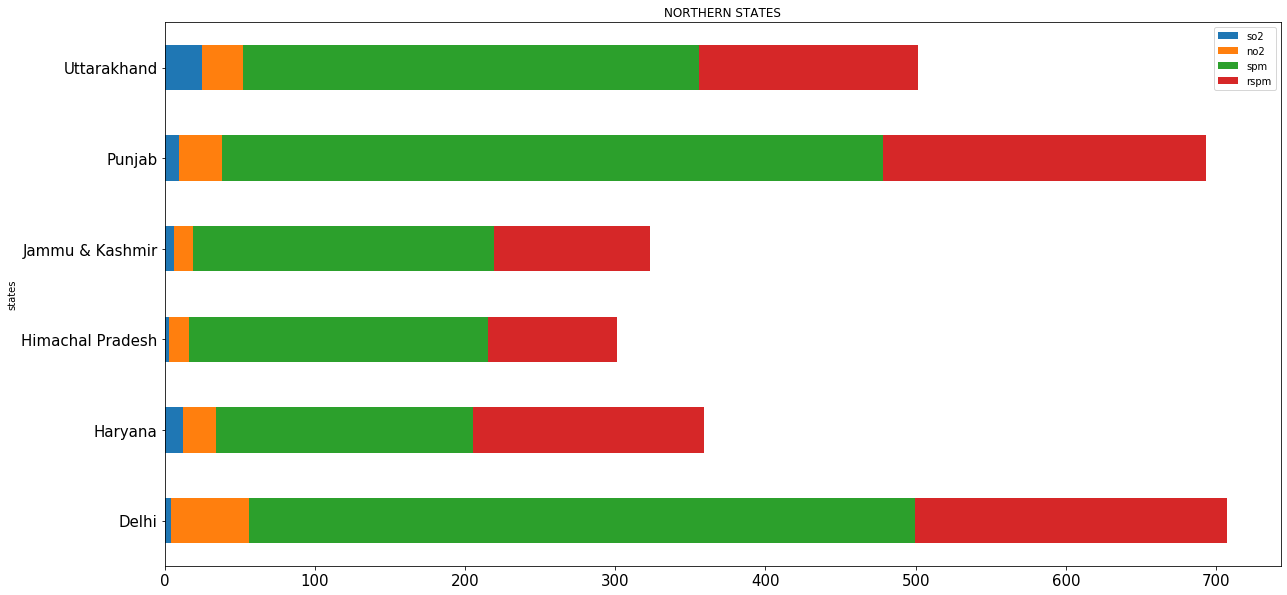

In [233]:
north1.plot(x='states',y=['so2','no2','spm','rspm'],kind='barh',stacked=True,title='NORTHERN STATES',figsize=(20,10),fontsize=15)

In [236]:
east=airpf.loc[['Bihar','Jharkhand','Odisha','West Bengal']]

In [245]:
#east

In [238]:
east1=east[['states','year','so2','no2','spm','rspm']].groupby('states').median().reset_index()

In [246]:
#east1

In [240]:
west=airpf.loc[['Dadra & Nagar Haveli','Daman & Diu','Goa','Gujarat','Maharashtra','Rajasthan']]

In [241]:
west1=west[['states','year','so2','no2','spm','rspm']].groupby('states').median().reset_index()

In [247]:
#west1

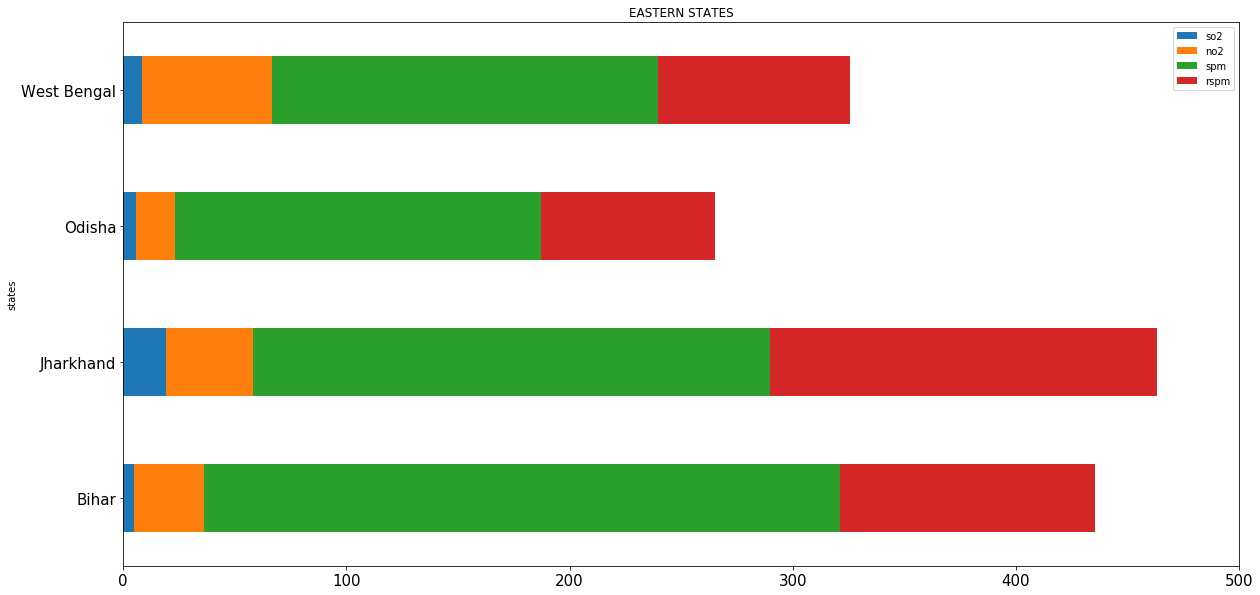

In [243]:
east1.plot(x='states',y=['so2','no2','spm','rspm'],kind='barh',stacked=True,xlim=(0,500),title='EASTERN STATES',figsize=(20,10),fontsize=15)

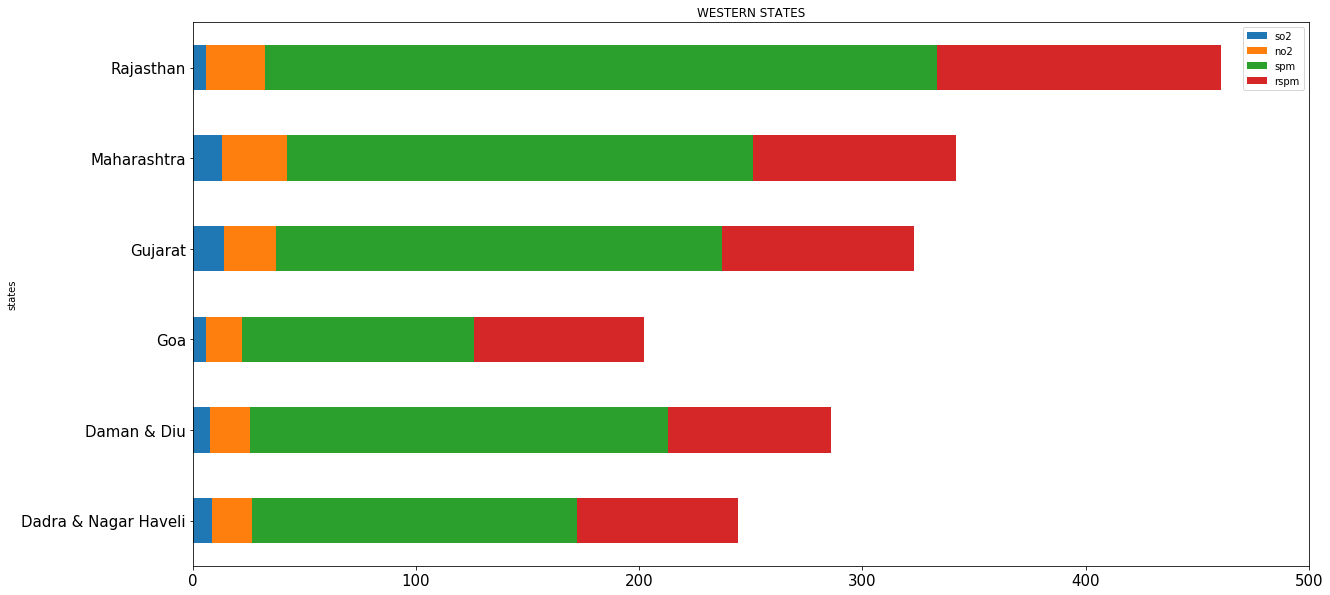

In [244]:
west1.plot(x='states',y=['so2','no2','spm','rspm'],kind='barh',stacked=True,xlim=(0,500),title='WESTERN STATES',figsize=(20,10),fontsize=15)

In [259]:
southtype=south[['states','type']].groupby(['type']).count().sort_values(by='states',ascending=False).reset_index()

In [ ]:
#count of each area type zone wise

In [260]:
southtype

,type,states
0,Residential and others,14449
1,Industrial Areas,10010
2,Sensitive Areas,1796


In [268]:
northtype=north[['states','type']].groupby(['type']).count().sort_values(by='states',ascending=False).reset_index()

In [269]:
northtype

,type,states
0,Residential and others,9889
1,Industrial Areas,8141
2,Sensitive Areas,542


In [261]:
#north

In [262]:
easttype=east[['states','type']].groupby(['type']).count().sort_values(by='states',ascending=False).reset_index()

In [263]:
easttype

,type,states
0,Industrial Areas,8874
1,Residential and others,8870


In [270]:
westtype=west[['states','type']].groupby(['type']).count().sort_values(by='states',ascending=False).reset_index()

In [271]:
westtype

,type,states
0,Residential and others,23690
1,Industrial Areas,13095
2,Sensitive Areas,400


In [273]:
southstation=south[['location_monitoring_station','states']].groupby(['states']).count().sort_values(by='states',ascending=False).reset_index()

In [ ]:
#count of location monitoring stations zone wise

In [274]:
southstation

,states,location_monitoring_station
0,Tamil Nadu,5666
1,Puducherry,767
2,Kerala,7784
3,Karnataka,3995
4,Andhra Pradesh,8043


In [302]:
sum(southstation['location_monitoring_station'])

26255

In [275]:
northstation=north[['location_monitoring_station','states']].groupby(['states']).count().sort_values(by='states',ascending=False).reset_index()

In [276]:
northstation

,states,location_monitoring_station
0,Uttarakhand,266
1,Punjab,7984
2,Jammu & Kashmir,383
3,Himachal Pradesh,6763
4,Haryana,1021
5,Delhi,2155


In [300]:
sum(northstation['location_monitoring_station'])

18572

In [277]:
eaststation=east[['location_monitoring_station','states']].groupby(['states']).count().sort_values(by='states',ascending=False).reset_index()

In [278]:
eaststation

,states,location_monitoring_station
0,West Bengal,9847
1,Odisha,4995
2,Jharkhand,2490
3,Bihar,412


In [303]:
sum(eaststation['location_monitoring_station'])

17744

In [280]:
weststation=west[['location_monitoring_station','states']].groupby(['states']).count().sort_values(by='states',ascending=False).reset_index()

In [281]:
weststation

,states,location_monitoring_station
0,Rajasthan,8228
1,Maharashtra,18899
2,Gujarat,7701
3,Goa,1409
4,Daman & Diu,480
5,Dadra & Nagar Haveli,468


In [299]:
sum(weststation['location_monitoring_station'])

37185

In [285]:
spmrate=airpf[['states','spm']].groupby('states').median().reset_index()

In [286]:
monitoring=airpf[['states','location_monitoring_station']].groupby('states').count().reset_index()


In [298]:
#monitoring

In [297]:
#spmrate

In [289]:
temp=pd.merge(monitoring,spmrate,on='states')

In [325]:
#temp

In [ ]:
#checking whether number of monitoring stations have any impact on spm

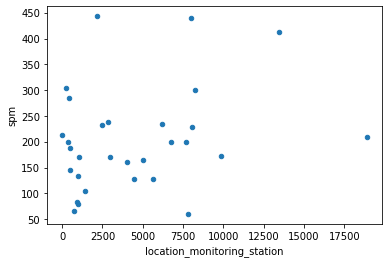

In [291]:
temp.plot(x='location_monitoring_station',y='spm',kind='scatter')

In [296]:
np.corrcoef(temp['location_monitoring_station'],temp['spm'])

array([[1.        , 0.26629393],
       [0.26629393, 1.        ]])

In [308]:
locwise=airpf[['states','location','so2','no2','rspm','spm']].groupby('states').max().reset_index()

In [329]:
#locwise1=airpf[['states','location','so2','no2','rspm','spm']].groupby('states').min().reset_index()

In [328]:
locwise1

,states,location,so2,no2,rspm,spm
0,Andhra Pradesh,Chittoor,2.00,5.00,3.000000,27.000000
1,Assam,Bongaigaon,2.00,5.00,9.000000,14.000000
2,Bihar,Patna,2.00,5.60,25.000000,52.000000
3,Chandigarh,Chandigarh,2.00,4.50,16.000000,37.000000
4,Chhattisgarh,Bhilai,2.00,11.00,40.000000,138.000000
5,Dadra & Nagar Haveli,Khadoli,6.70,15.00,18.000000,26.000000
6,Daman & Diu,Daman,6.60,13.10,16.000000,25.000000
7,Delhi,Delhi,2.00,14.60,18.000000,60.000000
8,Goa,Amona,2.00,0.00,13.000000,1.610000
9,Gujarat,Ahmedabad,3.60,10.00,24.000000,75.000000


In [316]:
#locwise.plot(x='location',y=['so2','no2','rspm','spm'],kind='bar',figsize=(16,5))

In [ ]:
#maximum count reported for every component location wise for each state.

In [313]:
locwise

,states,location,so2,no2,rspm,spm
0,Andhra Pradesh,Warangal,182.200000,334.9000,493.000000,805.000000
1,Assam,Tezpur,30.800000,51.0000,790.000000,1300.000000
2,Bihar,Patna,28.000000,129.3000,656.000000,864.000000
3,Chandigarh,Chandigarh,6.000000,54.0000,600.000000,961.000000
4,Chhattisgarh,Raipur,29.300000,62.8000,477.000000,650.000000
5,Dadra & Nagar Haveli,Silvassa,23.900000,39.3000,152.000000,390.000000
6,Daman & Diu,Daman,17.900000,51.0000,144.000000,330.000000
7,Delhi,Delhi,34.900000,151.0000,784.000000,1184.000000
8,Goa,Vasco,76.000000,66.0000,495.000000,601.000000
9,Gujarat,Vapi,64.000000,101.0000,249.000000,466.000000


In [330]:
#airpf